# Problem 1
**import libraries**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**loading the data**

In [76]:
#loading the training data
train=pd.read_parquet(r"C:\Users\Barry\Desktop\projects\akaike assignment\Structured_Data_Assignment\Structured_Data_Assignment\Structuredata_assignment\train.parquet")
test=pd.read_parquet(r"C:\Users\Barry\Desktop\projects\akaike assignment\Structured_Data_Assignment\Structured_Data_Assignment\Structuredata_assignment\test.parquet")


In [77]:
train.head(3)

Patient-Uid       Date           Incident
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09  PRIMARY_DIAGNOSIS
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16  PRIMARY_DIAGNOSIS
3  a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30     SYMPTOM_TYPE_0

In [78]:
test.head(3)

Patient-Uid       Date        Incident
0  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08  SYMPTOM_TYPE_0
1  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2018-10-17     DRUG_TYPE_0
2  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2017-12-01     DRUG_TYPE_2

In [79]:
train.shape,test.shape

((3220868, 3), (1065524, 3))

In [80]:
#number of unique patients 
num=train['Patient-Uid'].nunique()
print(f'number of patients {num}')
#number of patients who has taken target drug
num1=train[train['Incident']=='TARGET DRUG'].nunique()
print(f'number of patients who has taken TARGET DRUG In past :{num1}')

number of patients 27033
number of patients who has taken TARGET DRUG In past :Patient-Uid    9374
Date           1055
Incident          1
dtype: int64


In [81]:
# checking for null values
train.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [83]:
#converting date column to pandas datetime type
train['Date']=pd.to_datetime(train['Date'],format='%Y-%m-%d')
test['Date']=pd.to_datetime(test['Date'],format='%Y-%m-%d')

In [84]:
train.head()

Patient-Uid       Date           Incident
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09  PRIMARY_DIAGNOSIS
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16  PRIMARY_DIAGNOSIS
3  a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30     SYMPTOM_TYPE_0
4  a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2015-04-22        DRUG_TYPE_0
8  a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2016-06-18        DRUG_TYPE_1

# Featur engineering

In [85]:
# creating features based on days since target drugt taken and days since the last incident happend.
train['Days_since_last_incident'] = train.groupby('Patient-Uid')['Date'].diff().dt.days.fillna(0)
test['Days_since_last_incident'] = test.groupby('Patient-Uid')['Date'].diff().dt.days.fillna(0)

train['Days_since_last_target_drug'] = train[train['Incident'] == 'TARGET DRUG'].groupby('Patient-Uid')['Date'].diff().dt.days.fillna(0)
test['Days_since_last_target_drug'] = test[test['Incident'] == 'TARGET DRUG'].groupby('Patient-Uid')['Date'].diff().dt.days.fillna(0)

train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

# Create a target variable indicating whether the patient is eligible or not
train['Eligible'] = np.where(train['Incident'] == 'TARGET DRUG', 1, 0)

In [86]:
#converting categorical data into numerical
train=pd.get_dummies(train, columns=['Incident'])
test=pd.get_dummies(test, columns=['Incident'])


In [87]:
train.head(3)

Patient-Uid       Date  Days_since_last_incident  \
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09                       0.0   
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16                       0.0   
3  a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30                       0.0   

   Days_since_last_target_drug  Eligible  Incident_DRUG_TYPE_0  \
0                          0.0         0                     0   
1                          0.0         0                     0   
3                          0.0         0                     0   

   Incident_DRUG_TYPE_1  Incident_DRUG_TYPE_10  Incident_DRUG_TYPE_11  \
0                     0                      0                      0   
1                     0                      0                      0   
3                     0                      0                      0   

   Incident_DRUG_TYPE_12  ...  Incident_SYMPTOM_TYPE_7  \
0                      0  ...                        0   
1                      0  ...                        0   
3                      0  ...                        0   

   Incident_SYMPTOM_TYPE_8  Incident_SYMPTOM_TYPE_9  Incident_TARGET DRUG  \
0                        0                        0                     0   
1                        0                        0                     0   
3                        0                        0                     0   

   Incident_TEST_TYPE_0  Incident_TEST_TYPE_1  Incident_TEST_TYPE_2  \
0                     0                     0                     0   
1                     0                     0                     0   
3                     0                     0                     0   

   Incident_TEST_TYPE_3  Incident_TEST_TYPE_4  Incident_TEST_TYPE_5  
0                     0                     0                     0  
1                     0                     0                     0  
3                     0                     0                     0  

[3 rows x 62 columns]

In [88]:
train.reset_index(drop=True,inplace=True) #resetting the rows index number 
train.head()

Patient-Uid       Date  Days_since_last_incident  \
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09                       0.0   
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16                       0.0   
2  a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30                       0.0   
3  a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2015-04-22                       0.0   
4  a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2016-06-18                       0.0   

   Days_since_last_target_drug  Eligible  Incident_DRUG_TYPE_0  \
0                          0.0         0                     0   
1                          0.0         0                     0   
2                          0.0         0                     0   
3                          0.0         0                     1   
4                          0.0         0                     0   

   Incident_DRUG_TYPE_1  Incident_DRUG_TYPE_10  Incident_DRUG_TYPE_11  \
0                     0                      0                      0   
1                     0                      0                      0   
2                     0                      0                      0   
3                     0                      0                      0   
4                     1                      0                      0   

   Incident_DRUG_TYPE_12  ...  Incident_SYMPTOM_TYPE_7  \
0                      0  ...                        0   
1                      0  ...                        0   
2                      0  ...                        0   
3                      0  ...                        0   
4                      0  ...                        0   

   Incident_SYMPTOM_TYPE_8  Incident_SYMPTOM_TYPE_9  Incident_TARGET DRUG  \
0                        0                        0                     0   
1                        0                        0                     0   
2                        0                        0                     0   
3                        0                        0                     0   
4                        0                        0                     0   

   Incident_TEST_TYPE_0  Incident_TEST_TYPE_1  Incident_TEST_TYPE_2  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Incident_TEST_TYPE_3  Incident_TEST_TYPE_4  Incident_TEST_TYPE_5  
0                     0                     0                     0  
1                     0                     0                     0  
2                     0                     0                     0  
3                     0                     0                     0  
4                     0                     0                     0  

[5 rows x 62 columns]

In [89]:
train.columns

Index(['Patient-Uid', 'Date', 'Days_since_last_incident',
       'Days_since_last_target_drug', 'Eligible', 'Incident_DRUG_TYPE_0',
       'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10',
       'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12',
       'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14',
       'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16',
       'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_18',
       'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3', 'Incident_DRUG_TYPE_4',
       'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6', 'Incident_DRUG_TYPE_7',
       'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9',
       'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0',
       'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10',
       'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12',
       'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14',
       'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16',
       'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYP

# Data splitting

In [121]:
features = ['Days_since_last_incident',
       'Days_since_last_target_drug', 'Incident_DRUG_TYPE_0',
       'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10',
       'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12',
       'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14',
       'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16',
       'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_18',
       'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3', 'Incident_DRUG_TYPE_4',
       'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6', 'Incident_DRUG_TYPE_7',
       'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9',
       'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0',
       'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10',
       'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12',
       'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14',
       'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16',
       'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18',
       'Incident_SYMPTOM_TYPE_19', 'Incident_SYMPTOM_TYPE_2',
       'Incident_SYMPTOM_TYPE_20', 'Incident_SYMPTOM_TYPE_21',
       'Incident_SYMPTOM_TYPE_22', 'Incident_SYMPTOM_TYPE_23',
       'Incident_SYMPTOM_TYPE_24', 'Incident_SYMPTOM_TYPE_25',
       'Incident_SYMPTOM_TYPE_26', 'Incident_SYMPTOM_TYPE_27',
       'Incident_SYMPTOM_TYPE_28', 'Incident_SYMPTOM_TYPE_29',
       'Incident_SYMPTOM_TYPE_3', 'Incident_SYMPTOM_TYPE_4',
       'Incident_SYMPTOM_TYPE_5', 'Incident_SYMPTOM_TYPE_6',
       'Incident_SYMPTOM_TYPE_9', 'Incident_TARGET DRUG',
       'Incident_TEST_TYPE_0', 'Incident_TEST_TYPE_1', 'Incident_TEST_TYPE_2',
       'Incident_TEST_TYPE_3', 'Incident_TEST_TYPE_4', 'Incident_TEST_TYPE_5']
target = 'Eligible'
X=train[features]
y=train[target]

In [122]:
X.shape,y.shape

((3220868, 57), (3220868,))

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [124]:
#splitting tha data for train an test purpose
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

In [20]:
#  random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

# Make predictions on the validation set
y_pred = rf.predict(X_test)
f1 = f1_score(y_test,y_pred)

print(f"F1 score: {f1:.3f}")

F1 score: 0.925


In [125]:
# Gradient Boosting model
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

# Make predictions on the validation set
y_pred_gb=GB.predict(X_test)
f1=f1_score(y_test,y_pred_gb)
print(f"F1 score: {f1:.3f}")

F1 score: 1.000


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

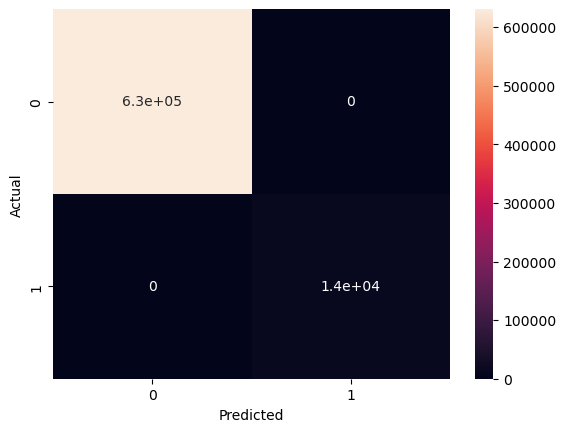

In [126]:
confusion_matrix = pd.crosstab(y_test, y_pred_gb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Building model with balanced data

In [ ]:
#as we are using F1 score metric it provides accurate result on both balanced and imbalanced data

# Predicting on test data

In [127]:
test.head()

Patient-Uid       Date  Days_since_last_incident  \
0  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08                       0.0   
1  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2018-10-17                     678.0   
2  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2017-12-01                    -320.0   
3  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2018-12-05                     369.0   
4  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2017-11-04                    -396.0   

   Days_since_last_target_drug  Incident_DRUG_TYPE_0  Incident_DRUG_TYPE_1  \
0                          0.0                     0                     0   
1                          0.0                     1                     0   
2                          0.0                     0                     0   
3                          0.0                     0                     1   
4                          0.0                     0                     0   

   Incident_DRUG_TYPE_10  Incident_DRUG_TYPE_11  Incident_DRUG_TYPE_12  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   Incident_DRUG_TYPE_13  ...  Incident_SYMPTOM_TYPE_6  \
0                      0  ...                        0   
1                      0  ...                        0   
2                      0  ...                        0   
3                      0  ...                        0   
4                      0  ...                        0   

   Incident_SYMPTOM_TYPE_7  Incident_SYMPTOM_TYPE_8  Incident_SYMPTOM_TYPE_9  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Incident_TEST_TYPE_0  Incident_TEST_TYPE_1  Incident_TEST_TYPE_2  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Incident_TEST_TYPE_3  Incident_TEST_TYPE_4  Incident_TEST_TYPE_5  
0                     0                     0                     0  
1                     0                     0                     0  
2                     0                     0                     0  
3                     0                     0                     0  
4                     0                     0                     0  

[5 rows x 59 columns]

In [128]:
test.columns

Index(['Patient-Uid', 'Date', 'Days_since_last_incident',
       'Days_since_last_target_drug', 'Incident_DRUG_TYPE_0',
       'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10',
       'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12',
       'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14',
       'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16',
       'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3',
       'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6',
       'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9',
       'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0',
       'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10',
       'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12',
       'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14',
       'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16',
       'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18',
       'Incident_SYMPTOM_TYPE_19', 'I

In [129]:
features_test=['Days_since_last_incident',
       'Days_since_last_target_drug', 'Incident_DRUG_TYPE_0',
       'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10',
       'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12',
       'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14',
       'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16',
       'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3',
       'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6',
       'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9',
       'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0',
       'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10',
       'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12',
       'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14',
       'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16',
       'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18',
       'Incident_SYMPTOM_TYPE_19', 'Incident_SYMPTOM_TYPE_2',
       'Incident_SYMPTOM_TYPE_20', 'Incident_SYMPTOM_TYPE_21',
       'Incident_SYMPTOM_TYPE_22', 'Incident_SYMPTOM_TYPE_23',
       'Incident_SYMPTOM_TYPE_24', 'Incident_SYMPTOM_TYPE_25',
       'Incident_SYMPTOM_TYPE_26', 'Incident_SYMPTOM_TYPE_27',
       'Incident_SYMPTOM_TYPE_28', 'Incident_SYMPTOM_TYPE_29',
       'Incident_SYMPTOM_TYPE_3', 'Incident_SYMPTOM_TYPE_4',
       'Incident_SYMPTOM_TYPE_5', 'Incident_SYMPTOM_TYPE_6',
       'Incident_SYMPTOM_TYPE_7', 'Incident_SYMPTOM_TYPE_8',
       'Incident_SYMPTOM_TYPE_9', 'Incident_TEST_TYPE_0',
       'Incident_TEST_TYPE_1', 'Incident_TEST_TYPE_2', 'Incident_TEST_TYPE_3',
       'Incident_TEST_TYPE_4', 'Incident_TEST_TYPE_5']
test_1=test[features_test] 
Patient_UId=test['Patient-Uid']

In [130]:
#predicting on test data
preds=GB.predict(test_1)

In [131]:
final_prediction=pd.DataFrame({'Patient-Uid': Patient_UId, 'label':preds})

In [134]:
# Save the final_prediction to a CSV file
final_prediction.to_csv('final_submission.csv', index=False)